 # APPLIED DATA SCIENCE CAPSTONE PROJECT
 ### Question 1 - The Battle of Neighbourhoods

### **A. INTRODUCTION**

### **A.1 Description & Disscusion of the Background**

##### BACKGROUND 
We are a research company that prepares criminological reports to private customers, governments. universities or small and medium sized enterprises (SMEs) in Istanbul, Turkey. One of our customers, Tourism Restaurant Investors and Operators Association approached us for consultancy services. Basically, they request from us to prepare a report on the following topics:
* 1. For a resident, which area has both the safest place and highly densed social places
* 2. For the potental investors, where to open up new venues which are crime free
* 3. For city governance. where to allocate resources effciently.


##### CITY OF ISTANBUL
Historically known as Byzantium and Constantinople, Istanbul is the largest city in Turkey and the country's economic, cultural and historic center, which
lies in both Europe and Asia, with a population of over 15 million residents,hosting 19 percent of the country's population.64.4% of the residents live on the European side and 35.6% on the Asian side. Currently, there are 39 districts in Istanbul. 


Istanbul ranks as the seventh-largest city proper in the world, and the second-largest urban agglomeration in Europe, after Moscow.The city's annual population growth of 1.5 percent ranks as one of the highest among the seventy-eight largest metropolises in the Organisation for Economic Co-operation and Development. In addition, The high population growth mirrors an urbanization trend across the country, as the second and third fastest-growing OECD metropolises are the Turkish cities of Izmir and Ankara. Moreover, Istanbul experienced especially rapid growth during the second half of the 20th century, with its population increasing tenfold between 1950 and 2000 [1].

All of these figures and information show that istanbul is a higly populated city as well as has a population density. Thanks to the Urbanization, social activitiy centers and entertainment places are clustered in the centers. In addition to this, as criminological theories assert that crime and ecological factors are related.  According to this approach, the higher the density of social venues, the greater the number of crimes. In particular, identification of the structural factors [2] that regards the spatial distribution of crime patterns—the ecological approach—has showed that crimes are alo clustered around the city center. According to this study, rates of crime were found to decrease as distance from the center of the city increased. 

Similarly, a scholar [3] argues that the prevention of crime through urban planning starts by addressing this question:**where—the identification of the precise location of the area and the type of area. On the question of “where,” the figures are examined in terms of the location.** By this approach, if exists, the relationship between the crime rate in Istanbul and the different parameters of the areas, in particular areas with higher density of social venues can be investigated. As above figures with regards to Istanbul showed istanbul is a city with a high population and population density as well as with establishments, shops and social sharing places in the city, which are located in densed population areas. Therefore, the location of social venues gain importance for different stakeholders.

#### LOCATION PROBLEM

As you can see from the statistics and theory, Istanbul is a city with a high population and population density. Being such a crowded city leads the owners of shops and social sharing places in the city where the population is dense. Finding hotspots gains importance to solve the crime problem as well as urban planing. This togetherness plays an important role for various stakeholders. Finding a safe location to open up a social venue, which will also have enough customers, requires an extensive research. Most of this market analysis can disregard the city structure of Istanbul. In terms of a city resident, he/She may prefer areas with a lower rate of crime with highly densed social places. On other hands, an investor may prefer districs where crime rate is lower and less tensed social places or venues; by this way she/he can install a businesss over these places where people can securely enjoy their time. For the government officials, knowing the association between higher density of social places and crime makes the resources allocated accordingly. However, getting this information together is a tough process, if taken consideration into obtaining of crime rates data and find a suitable solution for different stake holders. To shed light on this, a map and information chart can be formed on which the crime rate is placed based on the districts of Istanbul and each district is clustered according to the venue density. 


##### SOLUTION
Since Istanbul is a highly populated city, finding a crime-free location  with highly densed social venues requires data analytics and machine learning methods. Based on the demands of our customer, we can fulfil this by finding optimal location. In order to do so, different data sources and technical resources will be employed (They will described in detail later). We will benefit from some exploratory analysis, mapping, information chart and machine learning techniques to come up with a solution. As aforementioned, this repot will also benefit from criminological theories to make our case stronger.

### **A.2. Data Description**
To evaluate the problem below data is collected:

The  data regarding the Second-level Administrative Divisions of the Turkey from Spatial Data Repository of NYU was obtained from a github repository[4], from which the coordinates of the city and its districts were obtained. The population data for each district was scraped from Wikipedia [1]. The crime data of Istanbul per district was collected from an article, published in a journal [5].The crime rate was obtained by dividing the number of total crime to the population of each district.
I used Forsquare API to get the most common venues of given district of Istanbul [6]. By this way, crime rates along with social places and venues would be evaluated together. This will help us to spot the areas with social venues and cluster them based on their density along with crim rate.
It is not easy to find open source data regarding crime rates and other related data in Turkey. Hence, this data was collected from research articles and open sources that publish similar topics. I created my own data set, combining various sources. I used Google Map, ‘Search Nearby’ option to get the center coordinates of the each Dsitrict [7].

**This is an example of data, obtained from different resources.**


In [ ]:
import pandas as pd 
import numpy as np
import requests

url = 'https://raw.githubusercontent.com/machslearn/coursera-capstone-project/master/Istanbul.csv'

df = pd.read_csv(url, sep=',')

df.head()

,Borough,Crime Rate,Total Crime,Population,Latitude,Longitude
0,ADALAR,0.006,109,17760,40.8619,29.1208
1,AVCILAR,0.005,1122,233749,40.9880,28.7170
2,BAGCILAR,0.004,1569,355384,41.0450,28.8338
3,BAHCELIEVLER,0.006,2684,478623,40.9976,28.8500
4,BAKIRKOY,0.007,1528,208398,40.9835,28.8679


## PART 2
## **B. Methodology**
<p><strong>IN THIS PART I BENEFITED FROM TWO MAIN SOURCES, IBM FOURSQUARE LAB, WEBSCRAPING PART, A GITHUB ACCOUNT WHICH WAS SHOWN AS REFERENCE IN THE  REFERENCES SECTION. THE FUNCTIONS AND DATA ANALYSIS AND MACHINE LEARNING METHODS WERE ALSO BORROWED FROM IBM MATERIALS</strong></p> 

----

#### **B.1. Creating data table and data pre-processing**

As a database, I used GitHub repository in this study. My main data **df** which has the main components *Borough, Crime Rate, Total Crime, Latitude* and *Longitude* informations of the city.

In [ ]:
#url = 'https://raw.githubusercontent.com/machslearn/coursera-capstone-project/master/Istanbul.csv'
#df = pd.read_csv(url, sep=',')
df.head()

,Borough,Crime Rate,Total Crime,Population,Latitude,Longitude
0,ADALAR,0.006,109,17760,40.8619,29.1208
1,AVCILAR,0.005,1122,233749,40.9880,28.7170
2,BAGCILAR,0.004,1569,355384,41.0450,28.8338
3,BAHCELIEVLER,0.006,2684,478623,40.9976,28.8500
4,BAKIRKOY,0.007,1528,208398,40.9835,28.8679


#### **B.2. Visual Map & Clustering in Borough**
Some external libraries for mapping and clustering of the datas need to be imported  and we will work on Forsquare API part, as well. 

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from pandas import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


#### We will use folium library to visualize geographic details of Istanbul and its districts.

In [ ]:
!conda install -c conda-forge geopy --yes 
# uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim 
# convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.7.0 --yes 
# uncomment this line if you haven't completed the Foursquare API lab
import folium 
# map rendering library

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



#### I use geopy library to get the latitude and longitude values of Istanbul

In [ ]:
address = 'Istanbul, TR'

geolocator = Nominatim(user_agent="ist_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The Latitude and longitude coordinates of Istanbul are {}, {}.'.format(latitude, longitude))

The Latitude and longitude coordinates of Istanbul are 41.0096334, 28.9651646.


#### We can create a map of Istanbul with boroughs superimposed on top. We use latitude and longitude values to get the visual

In [ ]:
map_istanbul = folium.Map(location=[latitude, longitude], zoom_start=9.5)

# add markers to map
for lat, lng, borough in zip(df['Latitude'], df['Longitude'], df['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_istanbul)  
    
map_istanbul

### Let's utilizing the Foursquare API to explore the boroughs and segment them

In [ ]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = '20180605'


#### We will get the borough's latitude and longitude values.

In [ ]:
istanbul_data = df

borough_latitude = istanbul_data.loc[0, 'Latitude'] # neighborhood latitude value
borough_longitude = istanbul_data.loc[0, 'Longitude'] # neighborhood longitude value

borough_name = istanbul_data.loc[0, 'Borough'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(borough_name, 
                                                               borough_latitude, 
                                                               borough_longitude))

Latitude and longitude values of ADALAR are 40.8619, 29.1208.


#### TO GET THE INFORMATION FROM FOURSQUARE API; WE CERATE GET REQUEST FOR URL BY DESIGINING the LIMIT as 100 VENUES and the RADIUS 750 METER for EACH DISTRICT

In [ ]:
LIMIT = 100
radius = 750
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    borough_latitude, 
    borough_longitude, 
    radius, 
    LIMIT)

In [ ]:
results = requests.get(url).json()

**From the Foursquare lab, we know that all the information is in the items key. Before we proceed, let's borrow the *get_category_type* function from the Foursquare lab.**

In [ ]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

**Now we are ready to clean the json and structure it into a pandas dataframe**

In [ ]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Büyükada Tepesi,Mountain,40.861107,29.117418
1,Eski Rum Yetimhanesi,Historic Site,40.861705,29.123323
2,Aşıklar butik by şükrü,Hotel,40.862570,29.118003
3,Büyükada Bisiklet Parkuru,Bike Trail,40.865000,29.116861
4,Büyükada Lale köşkü,Bed & Breakfast,40.865657,29.125223


The number of  venues is returned by Foursquare=41

In [ ]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

41 venues were returned by Foursquare.


#### **B.3. Exploring Boroughs in Istanbul**
This function was borrowed from IBM LAB to get all the boroughs in Istanbul.

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        # prints the names of districts    
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now we can run the above function on each borough and create a new dataframe called **istanbul_venues**

In [ ]:
istanbul_venues = getNearbyVenues(names=istanbul_data['Borough'],
                                   latitudes=istanbul_data['Latitude'],
                                   longitudes=istanbul_data['Longitude']
                                  )

ADALAR
AVCILAR
BAGCILAR
BAHCELIEVLER
BAKIRKOY
BAYRAMPASA
BESIKTAS
BEYKOZ
BEYOGLU
BUYUKCEKMECE
CATALCA
ESENLER
EYUP
FATIH
GAZIOSMANPASA
GUNGOREN
KADIKOY
KAGITHANE
KARTAL
KUCUKCEKMECE
MALTEPE
PENDIK
SARIYER
SILE
SILIVRI
SISLI
SULTANBEYLI
TUZLA
UMRANIYE
USKUDAR
ZEYTINBURNU


#### Let's check the size of the resulting dataframe

In [ ]:
print(istanbul_venues.shape)
istanbul_venues.head()

(1575, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ADALAR,40.8619,29.1208,Büyükada Tepesi,40.861107,29.117418,Mountain
1,ADALAR,40.8619,29.1208,Eski Rum Yetimhanesi,40.861705,29.123323,Historic Site
2,ADALAR,40.8619,29.1208,Aşıklar butik by şükrü,40.862570,29.118003,Hotel
3,ADALAR,40.8619,29.1208,Büyükada Bisiklet Parkuru,40.865000,29.116861,Bike Trail
4,ADALAR,40.8619,29.1208,Nizam Butik Otel & Bistro,40.863322,29.116257,Bed & Breakfast


#### Let's check how many venues were returned for each borough and sort them in count

In [ ]:
summary = istanbul_venues.groupby('Borough').count().reset_index()
summary['Count'] = summary['Venue']
summary = summary.drop(['Borough Latitude', 'Borough Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category'], axis=1)
summary = summary.sort_values('Count').reset_index(drop=True)
summary.head()

,Borough,Count
0,PENDIK,9
1,BUYUKCEKMECE,13
2,ADALAR,14
3,TUZLA,14
4,KARTAL,26


**We can create a bar chart and analyze the total number of venues for each district**

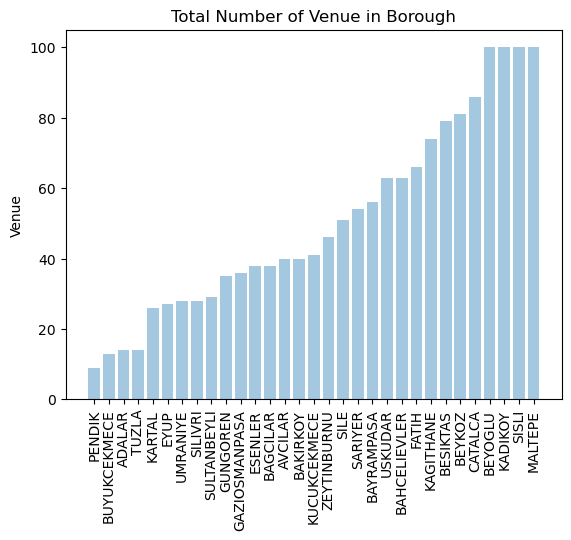

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = summary.Borough
y_pos = np.arange(len(objects))
performance = summary.Count

plt.bar(y_pos, performance, align='center', alpha=0.4)
plt.xticks(y_pos, objects)
plt.ylabel('Venue')
plt.title('Total Number of Venue in Borough')
plt.xticks(rotation=90)

plt.show()

##### EXPLANATION FOR BAR CHART
From the Bar graph  we can see that Kadikoy, Maltepe, Beyoglu, and Sisli  reached the 100 limit of venues. On the other hand; Pendik, Tuzla, Adalar and Buyukcekmece boroughs are below 20 venues in our given coordinates with Latitude and Longitude.

The result doesn't mean that inquiry run all the possible results in boroughs. Actually, it depends on given Latitude and Longitude informations and here is we just run single Latitude and Longitude pair for each borough. We can increase the possibilities with Neighborhood informations with more Latitude and Longitude informations.

Let's find out how many unique categories can be curated from all the returned venues

In [ ]:
print('There are {} uniques categories.'.format(len(istanbul_venues['Venue Category'].unique())))

There are 239 uniques categories.


#### **B.4. Analyzing Each Borough**

We will anayze each borough with venues informations: In this part, we apply one hot encoding for each district whether a venue exists or not in a given district. This can help us group them later.

In [ ]:
# one hot encoding
istanbul_onehot = pd.get_dummies(istanbul_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
istanbul_onehot['Borough'] = istanbul_venues['Borough'] 

# move neighborhood column to the first column
list_column = istanbul_onehot.columns.tolist()
number_column = int(list_column.index('Borough'))
list_column = [list_column[number_column]] + list_column[:number_column] + list_column[number_column+1:] 
istanbul_onehot = istanbul_onehot[list_column]

istanbul_onehot.head()

,Borough,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Basketball Court,Bath House,Beach,Bed & Breakfast,Beer Garden,Betting Shop,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Boarding House,Boat or Ferry,Bookstore,Borek Place,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Business Center,Business Service,Café,Camera Store,Campground,Candy Store,Car Wash,Carpet Store,Castle,Caucasian Restaurant,Chinese Restaurant,Chocolate Shop,Church,Cigkofte Place,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Classroom,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Escape Room,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Forest,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,General Entertainment,General Travel,Gift Shop,Gozleme Place,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Home Service,Hookah Bar,Hotel,Hotel Bar,Hunting Supply,Ice Cream Shop,Indie Movie Theater,Insurance Office,Italian Restaurant,Jazz Club,Jewelry Store,Kebab Restaurant,Kids Store,Kofte Place,Kokoreç Restaurant,Lighthouse,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Metro Station,Meyhane,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Mosque,Motorcycle Shop,Mountain,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nature Preserve,Night Market,Nightclub,Non-Profit,Opera House,Optical Shop,Other Event,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paintball Field,Palace,Park,Pastry Shop,Performing Arts Venue,Perfume Shop,Persian Restaurant,Pharmacy,Pide Place,Pie Shop,Pilavcı,Pizza Place,Plaza,Pool,Pool Hall,Pub,Public Art,Racetrack,Radio Station,Record Shop,Recreation Center,Rental Car Location,Restaurant,River,Road,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Stationery Store,Steakhouse,Street Art,Supermarket,Surf Spot,Sushi Restaurant,Söğüş Place,Taco Place,Tattoo Parlor,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Tourist Information Center,Toy / Game Store,Trail,Tram Station,Tree,Turkish Home Cooking Restaurant,Turkish Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Çöp Şiş Place
0,ADALAR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ADALAR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

#### Next, let's group rows by borough and by taking the mean of the frequency of occurrence of each category

In [ ]:
istanbul_grouped = istanbul_onehot.groupby('Borough').mean().reset_index()
istanbul_grouped.head()

,Borough,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Basketball Court,Bath House,Beach,Bed & Breakfast,Beer Garden,Betting Shop,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Boarding House,Boat or Ferry,Bookstore,Borek Place,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Business Center,Business Service,Café,Camera Store,Campground,Candy Store,Car Wash,Carpet Store,Castle,Caucasian Restaurant,Chinese Restaurant,Chocolate Shop,Church,Cigkofte Place,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Classroom,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Escape Room,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Forest,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,General Entertainment,General Travel,Gift Shop,Gozleme Place,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Home Service,Hookah Bar,Hotel,Hotel Bar,Hunting Supply,Ice Cream Shop,Indie Movie Theater,Insurance Office,Italian Restaurant,Jazz Club,Jewelry Store,Kebab Restaurant,Kids Store,Kofte Place,Kokoreç Restaurant,Lighthouse,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Metro Station,Meyhane,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Mosque,Motorcycle Shop,Mountain,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nature Preserve,Night Market,Nightclub,Non-Profit,Opera House,Optical Shop,Other Event,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paintball Field,Palace,Park,Pastry Shop,Performing Arts Venue,Perfume Shop,Persian Restaurant,Pharmacy,Pide Place,Pie Shop,Pilavcı,Pizza Place,Plaza,Pool,Pool Hall,Pub,Public Art,Racetrack,Radio Station,Record Shop,Recreation Center,Rental Car Location,Restaurant,River,Road,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Stationery Store,Steakhouse,Street Art,Supermarket,Surf Spot,Sushi Restaurant,Söğüş Place,Taco Place,Tattoo Parlor,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Tourist Information Center,Toy / Game Store,Trail,Tram Station,Tree,Turkish Home Cooking Restaurant,Turkish Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Çöp Şiş Place
0,ADALAR,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.000000,0.000,0.000000,0.0,0.0,0.071429,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.142857,0.0,0.071429,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000,0.000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.071429,0.0,0.0,0.0,0.000000,0.0,0.0,0.071429,0.0,0.000000,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.142857,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,

#### Let's put that into a pandas dataframe

This function was also borrowed from IBM LAB to sort the venues in descending order.


In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
boroughs_venues_sorted = pd.DataFrame(columns=columns)
boroughs_venues_sorted['Borough'] = istanbul_grouped['Borough']

for ind in np.arange(istanbul_grouped.shape[0]):
    boroughs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(istanbul_grouped.iloc[ind, :], num_top_venues)

boroughs_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ADALAR,Café,Hotel,Mountain,Tea Room,Garden Center,Campground,Forest,Road,Bed & Breakfast,Nature Preserve
1,AVCILAR,Café,Hotel,Turkish Restaurant,Ice Cream Shop,Dessert Shop,Mobile Phone Shop,Modern European Restaurant,Fast Food Restaurant,Other Event,Diner
2,BAGCILAR,Café,Turkish Restaurant,Pizza Place,Kebab Restaurant,Gym,Park,Steakhouse,Department Store,Lounge,Market
3,BAHCELIEVLER,Turkish Restaurant,Café,Kebab Restaurant,Furniture / Home Store,Men's Store,Motorcycle Shop,Park,Steakhouse,Ice Cream Shop,Burger Joint
4,BAKIRKOY,Turkish Restaurant,Gym,Spa,Dessert Shop,Bookstore,Park,Tennis Court,Athletics & Sports,Sandwich Place,Tea Room


#### **B.5. Cluster of Boroughs**

K-Means algorithm is one of the most common cluster method of **unsupervised learning**, thus K-Means algorithm will be utilized in this project.

I will run K-Means to cluster the boroughs into 3 clusters because when I analyze the K-Means with elbow method it ensured me the 3 degree for optimum k of the K-Means

In [ ]:
# importing kneed package dtermine optimum cluster number
!pip install kneed

In [ ]:
# set number of clusters
kclusters = 3

istanbul_grouped_clustering = istanbul_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(istanbul_grouped_clustering)

# check cluster labels generated for each row in the dataframe
labels = kmeans.labels_
labels

array([2, 0, 2, 2, 2, 1, 2, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 1, 1, 2, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 2])

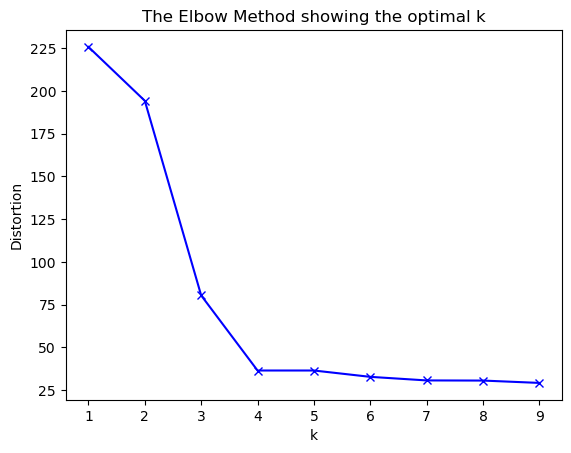

In [ ]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(istanbul_grouped_clustering)
    #kmeanModel.fit(istanbul_grouped_clustering)
    distortions.append(sum(np.min(cdist(istanbul_grouped_clustering, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / istanbul_grouped_clustering.shape[0])

#There are different metric distance function for spatial distance. 
#I choose correlation instaed of euclidean because the canberra function gives me more clear view of elbow break point.

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

**Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.**

In [ ]:
istanbul_merged = istanbul_data

# add clustering labels
istanbul_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
istanbul_merged = istanbul_merged.join(boroughs_venues_sorted.set_index('Borough'), on='Borough')

istanbul_merged.head() # check the last columns!

,Borough,Crime Rate,Total Crime,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ADALAR,0.006,109,17760,40.8619,29.1208,2,Café,Hotel,Mountain,Tea Room,Garden Center,Campground,Forest,Road,Bed & Breakfast,Nature Preserve
1,AVCILAR,0.005,1122,233749,40.9880,28.7170,0,Café,Hotel,Turkish Restaurant,Ice Cream Shop,Dessert Shop,Mobile Phone Shop,Modern European Restaurant,Fast Food Restaurant,Other Event,Diner
2,BAGCILAR,0.004,1569,355384,41.0450,28.8338,2,Café,Turkish Restaurant,Pizza Place,Kebab Restaurant,Gym,Park,Steakhouse,Department Store,Lounge,Market
3,BAHCELIEVLER,0.006,2684,478623,40.9976,28.8500,2,Turkish Restaurant,Café,Kebab Restaurant,Furniture / Home Store,Men's Store,Motorcycle Shop,Park,Steakhouse,Ice Cream Shop,Burger Joint
4,BAKIRKOY,0.007,1528,208398,40.9835,28.8679,2,Turkish Restaurant,Gym,Spa,Dessert Shop,Bookstore,Park,Tennis Court,Athletics & Sports,Sandwich Place,Tea Room


**Let us drop Total Crime and Population columns**

In [ ]:
istanbul_merged.drop(['Total Crime','Population'], axis=1, inplace=True)
istanbul_merged

,Borough,Crime Rate,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ADALAR,0.006,40.8619,29.1208,2,Café,Hotel,Mountain,Tea Room,Garden Center,Campground,Forest,Road,Bed & Breakfast,Nature Preserve
1,AVCILAR,0.005,40.9880,28.7170,0,Café,Hotel,Turkish Restaurant,Ice Cream Shop,Dessert Shop,Mobile Phone Shop,Modern European Restaurant,Fast Food Restaurant,Other Event,Diner
2,BAGCILAR,0.004,41.0450,28.8338,2,Café,Turkish Restaurant,Pizza Place,Kebab Restaurant,Gym,Park,Steakhouse,Department Store,Lounge,Market
3,BAHCELIEVLER,0.006,40.9976,28.8500,2,Turkish Restaurant,Café,Kebab Restaurant,Furniture / Home Store,Men's Store,Motorcycle Shop,Park,Steakhouse,Ice Cream Shop,Burger Joint
4,BAKIRKOY,0.007,40.9835,28.8679,2,Turkish Restaurant,Gym,Spa,Dessert Shop,Bookstore,Park,Tennis Court,Athletics & Sports,Sandwich Place,Tea Room
5,BAYRAMPASA,0.007,41.0477,28.8992,1,Clothing Store,Restaurant,Sporting Goods Shop,Shopping Mall,Ice Cream Shop,Gym,Food Court,Café,Pie Shop,Snack Place
6,BESIKTAS,0.015,41.0469,29.0078,2,Coffee Shop,Café,Pub,Performing Arts Venue,Burger Joint,Chocolate Shop,Seafood Restaurant,Park,Historic Site,Art Gallery
7,BEYKOZ,0.005,41.0936,29.0879,0,Café,Turkish Restaurant,Breakfast Spot,Restaurant,Bistro,Dessert Shop,Turkish Home Cooking Restaurant,Park,Clothing Store,Seafood Restaurant
8,BEYOGLU,0.017,41.0300,28.9748,2,Hotel,Restaurant,Coffee Shop,Art Gallery,Café,Cocktail Bar,Turkish Restaurant,Lounge,Kebab Restaurant,Bar
9,BUYUKCEKMECE,0.022,41.0198,28.5664,1,Seafood Restaurant,Clothing Store,Other Great Outdoors,Café,Surf Spot,River,Paintball Field,Steakhouse,Volleyball Court,Whisky Bar


Here you can see an example to estimate the number of **1st Most Common Venue** in each cluster.Thus, we can create a bar chart which may help us to find proper label names for each cluster.

In [ ]:
count_venue = istanbul_merged
count_venue = count_venue.drop(['Borough','Crime Rate', 'Latitude', 'Longitude'], axis=1)
count_venue = count_venue.groupby(['Cluster Labels','1st Most Common Venue']).size().reset_index(name='Counts')

#we can transpose it to plot bar chart
cv_cluster = count_venue.pivot(index='Cluster Labels', columns='1st Most Common Venue', values='Counts')
cv_cluster = cv_cluster.fillna(0).astype(int).reset_index(drop=True)
cv_cluster

1st Most Common Venue,Bus Station,Café,Clothing Store,Coffee Shop,Hotel,Kebab Restaurant,Park,Seafood Restaurant,Turkish Restaurant
0,0,12,0,0,0,0,1,0,0
1,1,0,2,0,0,0,0,1,0
2,0,7,0,1,1,1,0,0,4


Text(0, 0.5, 'Clusters')

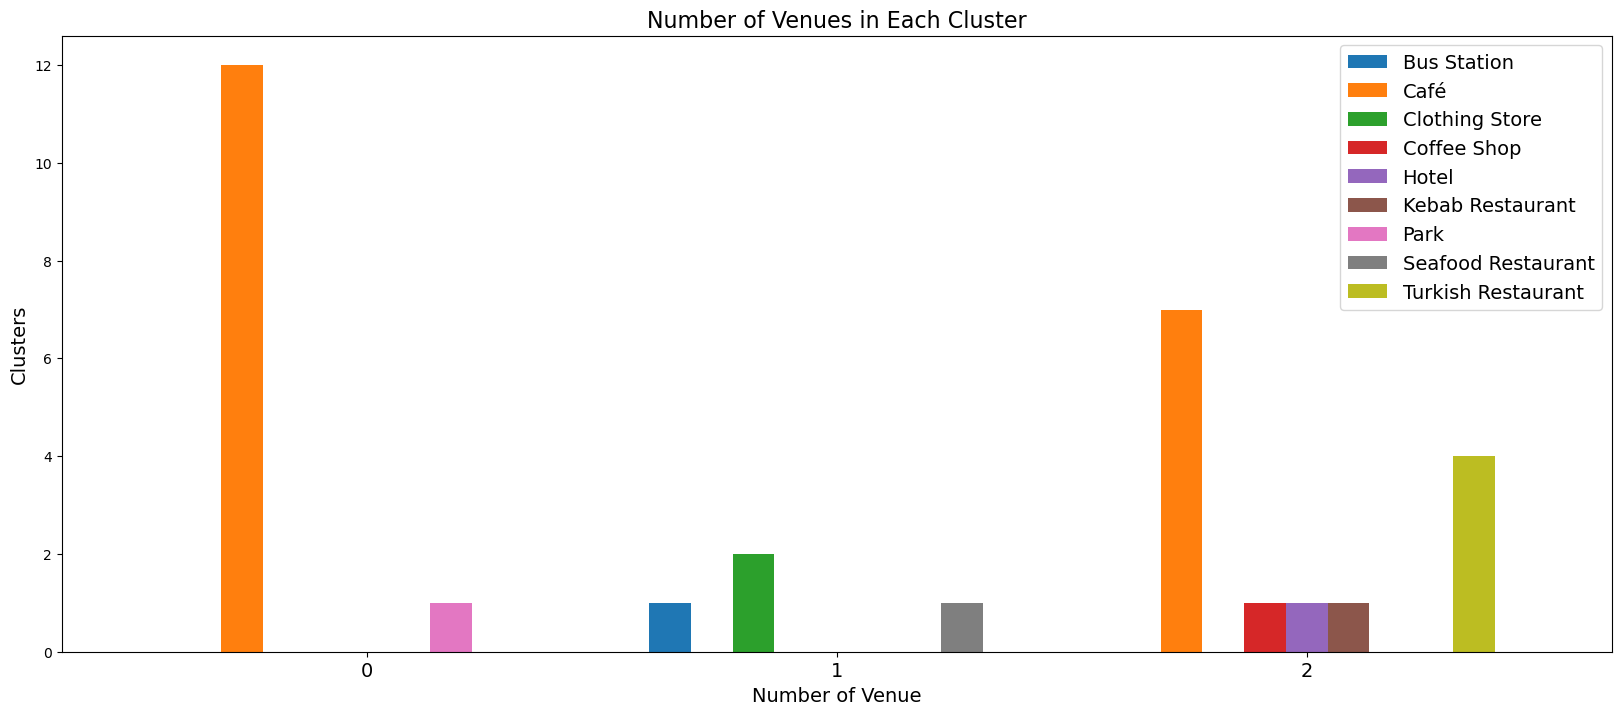

In [ ]:
#creating a bar chart of "Number of Venues in Each Cluster"
frame=cv_cluster.plot(kind='bar',figsize=(20,8),width = 0.8)

plt.legend(labels=cv_cluster.columns,fontsize= 14)
plt.title("Number of Venues in Each Cluster",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Number of Venue', fontsize=14)
plt.ylabel('Clusters', fontsize=14)

When we examine above graph we can label each cluster as follows:
* Cluster 0 : "Cafe Venues"
* Cluster 1 : "Stores and Station"
* Cluster 2 : "Accommodation & Intensive Cafe Venues & Restaurants"

We can now assign those new labels to existing label of clusters:

In [ ]:
Cluster_labels = {'Clusters': [0,1,2], 'Labels': ["Cafe Venues","Stores and Station","Accommodation & Intensive Cafe Venues & Restaurants"]}
Cluster_labels = pd.DataFrame(data=Cluster_labels)
Cluster_labels

,Clusters,Labels
0,0,Cafe Venues
1,1,Stores and Station
2,2,Accommodation & Intensive Cafe Venues & Restau...


**Let's analyze the crime rate in specific range. Thus we can create new labels which involve crime rates features, as well.**

In [ ]:
data_process = df.sort_values('Crime Rate').reset_index(drop=True)
data_process = data_process.drop(['Latitude', 'Longitude', 'Total Crime', 'Population'], axis=1)
data_process.head()

,Borough,Crime Rate,Cluster Labels
0,GUNGOREN,0.003,2
1,BAGCILAR,0.004,2
2,SULTANBEYLI,0.004,2
3,PENDIK,0.004,0
4,KUCUKCEKMECE,0.004,2


**We can examine that what is the frequency of crime rates in different ranges. Thus, histogram can help for visualization.**

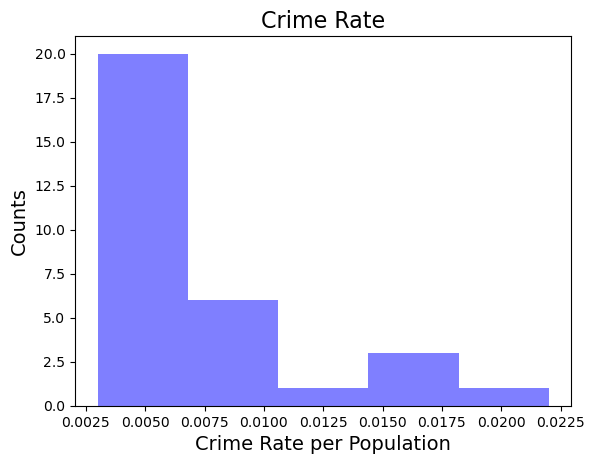

In [ ]:
num_bins = 5
n, bins, patches = plt.hist(data_process['Crime Rate'], num_bins, facecolor='blue', alpha=0.5)

plt.title("Crime Rate",fontsize= 16)
plt.xticks(fontsize=10)
plt.xticks(rotation=0)
plt.xlabel('Crime Rate per Population', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.show()

#### As it seems in above histogram, we can define the ranges as below:

* 0.0060 CR : "Low Level CR"
* 0.0060-0.0105 CR : "Mid-1 Level CR"
* 0.0105-0.0145 CR : "Mid-2 Level CR"
* 0.0145-0.0180 CR : "High-1 Level CR"
* '>' 0.0180 CR : "High-2 Level CR"

In this case, we can create **"Level_labels"** with those levels.

In [ ]:
level = []
for i in range(0,len(data_process)):
    if (data_process['Crime Rate'][i] < 0.0065):
        level.append("Low Level CR")
    elif (data_process['Crime Rate'][i] >= 0.0065 and data_process['Crime Rate'][i] < 0.0105):
        level.append("Mid-1 Level CR")
    elif (data_process['Crime Rate'][i] >= 0.0105 and data_process['Crime Rate'][i] < 0.0145):
        level.append("Mid-2 Level CR")
    elif (data_process['Crime Rate'][i] >= 0.0145 and data_process['Crime Rate'][i] < 0.0180):
        level.append("High-1 Level CR")
    else:
        level.append("High-2 Level CR")   

data_process['Level_labels'] = level
data_process.head()

,Borough,Crime Rate,Cluster Labels,Level_labels
0,GUNGOREN,0.003,2,Low Level CR
1,BAGCILAR,0.004,2,Low Level CR
2,SULTANBEYLI,0.004,2,Low Level CR
3,PENDIK,0.004,0,Low Level CR
4,KUCUKCEKMECE,0.004,2,Low Level CR


Based on the aims of dofferent stakeholders, I wanted to show the number of top 3 venues information for each borough on the map. Thus, I grouped each borough by the number of top 3 venues and I combined those informations in **Join** column. For example, In AVCILAR DISTRICT OF INSTANBUL; there 16 cafes. This information can be compared with other data at our disposal to gain insight  on the area.

In [ ]:
top3 = istanbul_venues.groupby(['Borough','Venue Category']).size().reset_index(name='Counts')
top3 = top3.sort_values(['Borough','Counts'],ascending=False).groupby('Borough').head(3).reset_index(drop=True)

top3['Join'] = top3['Counts'].map(str) + " " + top3['Venue Category']
top3 = top3.groupby(['Borough'])['Join'].apply(", ".join).reset_index()

top3.head()

,Borough,Join
0,ADALAR,"2 Café, 2 Hotel, 1 Bed & Breakfast"
1,AVCILAR,"16 Café, 2 Hotel, 2 Turkish Restaurant"
2,BAGCILAR,"5 Café, 3 Turkish Restaurant, 2 Gym"
3,BAHCELIEVLER,"8 Turkish Restaurant, 7 Café, 4 Kebab Restaurant"
4,BAKIRKOY,"3 Gym, 3 Turkish Restaurant, 2 Athletics & Sports"


### C. Results
#### C.1. Main table with results
**Let's merge those new variables with related cluster informations in our main istanbul_merged table.**

In [ ]:
import numpy as np

result = pd.merge(istanbul_merged, 
                    top3[['Borough', 'Join']],
                    left_on = 'Borough',
                    right_on = 'Borough',
                    how = 'left')
result= pd.merge(result, 
                    Cluster_labels[['Clusters', 'Labels']],
                    left_on = 'Cluster Labels',
                    right_on = 'Clusters',
                    how = 'left')
result = pd.merge(result, 
                    data_process[['Borough', 'Level_labels']],
                    left_on = 'Borough',
                    right_on = 'Borough',
                    how = 'left')

result = result.drop(['Clusters'], axis=1)
result.head(3)

,Borough,Crime Rate,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Join,Labels,Level_labels
0,ADALAR,0.006,40.8619,29.1208,2,Café,Hotel,Mountain,Tea Room,Garden Center,Campground,Forest,Road,Bed & Breakfast,Nature Preserve,"2 Café, 2 Hotel, 1 Bed & Breakfast",Accommodation & Intensive Cafe Venues & Restau...,Low Level CR
1,AVCILAR,0.005,40.9880,28.7170,0,Café,Hotel,Turkish Restaurant,Ice Cream Shop,Dessert Shop,Mobile Phone Shop,Modern European Restaurant,Fast Food Restaurant,Other Event,Diner,"16 Café, 2 Hotel, 2 Turkish Restaurant",Cafe Venues,Low Level CR
2,BAGCILAR,0.004,41.0450,28.8338,2,Café,Turkish Restaurant,Pizza Place,Kebab Restaurant,Gym,Park,Steakhouse,Department Store,Lounge,Market,"5 Café, 3 Turkish Restaurant, 2 Gym",Accommodation & Intensive Cafe Venues & Restau...,Low Level CR


**WE NOW COMBINED THREE DIFFERENT DATAFRAMES AND CREATED A NEW ONE; WHICH INCLUDES NE COLUMNS AS JOIN, LABELS and LEVEL_LABELS columns as the LAST 3 COLUMNS in above table.**


#### C.2. Map of Cluster Results
**Finally, let's visualize the resulting clusters**

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, join, cluster_number, label in zip(result['Latitude'], result['Longitude'], result['Borough'], result['Labels'], result['Join'], result['Cluster Labels'], result['Level_labels']):
    label = folium.Popup(str(poi) + " / " + str(cluster) + "-" + str(label) + " / " + str(join), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        color= rainbow[cluster_number-1],
        popup=label,
        fill_color = rainbow[cluster_number-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

### C3. MAP OF CRIME RATES
In summary section, one of my aim was also visualize the Crime Rates with choropleth style map. Thus, first I downloaded a json file of Istanbul [8]. 

Here is the the final version of json file on GitHub link:

In [ ]:
!pip install wget

In [ ]:
!python -m wget https://raw.githubusercontent.com/Srcanyildiz/istanbul/master/istanbul_geo_1.json -o istanbul_geo.json


Saved under istanbul_geo (1).json


In [ ]:
istanbul_geo = r'istanbul_geo.json'

#istanbul 
latitude = 41.01
longitude = 28.96028

# display San-Francisco
istanbul_map = folium.Map(location=[latitude, longitude], zoom_start=10)

In final section, I created choropleth map which also has the below informations for each borough:
* Borough name,
* Cluster name,
* Crime Rate (CR) Levels,
* Top 3 number of venue

In [ ]:
istanbul_map.choropleth(
    geo_data=istanbul_geo,
    data=istanbul_data,
    columns=['Borough','Crime Rate'],
    key_on='feature.properties.name_2',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in Istanbul',
    highlight=True
)

markers_colors = []
for lat, lon, poi, cluster, join, cluster_number, label in zip(result['Latitude'], result['Longitude'], result['Borough'], result['Labels'], result['Join'], result['Cluster Labels'], result['Level_labels']):
    label = folium.Popup(str(poi) + " / " + str(cluster) + "-" + str(label) + " / " + str(join), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color= rainbow[cluster_number-1],
        fill=True,
        fill_color= rainbow[cluster_number-1],
        fill_opacity=1).add_to(istanbul_map)
   


# show 
istanbul_map

C:\Users\Yasin\anaconda3\lib\site-packages\folium\folium.py:428: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


#### Choropleth-maps

---

**IF YOU UPDATE FOLIUM TO LATEST VERSION, YOU CAN USE NEW CLASS OF CHOROPLETH to AVOID WARNINGS**.
[UPdated Class of Choropleth](https://python-visualization.github.io/folium/quickstart.html)

## **D. Discussion**

As discussed before, Istanbul is a big city with a high population density. Daily movement in the city, the number of social venues and the total number of crimes and population densities of the 39 districts in total can vary. To find a solution to the problem of this study, we can use different machine learning methods, such as clustering and classification method. **Clustering is a set of techniques used to partition data into groups, or clusters.** In particular, one of the methods of Partitional clustering was employed, which divides data objects into nonoverlapping groups. In other words, no object can be a member of more than one cluster, and every cluster must have at least one object. These techniques require the user to specify the number of clusters, indicated by the variable k. Many partitional clustering algorithms work through an iterative process to assign subsets of data points into k clusters. [9] Based on this method, Kmeans algorithm as part of this clustering study was performed with optimum k value=3. To determine k value, the elbow method was used, which yielded k value as 3. However, in this study, I used 32 districts of Istanbul because I could not obtain crime data for some boroughs. The Crime data is at the borough level, so the next step can be to classify the crime data into the neighborhood level to see exact relationship between the density of social venues and crime rate.

<p>I carried out exploratory analysis and data analysis with the help of Foursquare API, the coordinates of Istanbul obtained from a Gitgub account and crime data from a research article. Crime rates were also calssified into 5 levels and later these results were combined with boroughs as well as integrating the number of social venues to these figures. This analysis was reflected in different maps as well as in Choropleth-map.</p>

Consequently, Current map gives an idea for a city resident, an investor and city governance in terms of their interests. In future studies, crime data can be obtained for each neighborhood. By this way, an exact result for data analysis can be reached.


## **F. Conclusion**

As mentioned before,One of our customers, Tourism Restaurant Investors and Operators Association request from us to prepare a report on the following topics:
* 1. For a resident, which area has both the safest place and highly densed social places
* 2. For the potental investors, where to open up new venues which are crime free
* 3. For city governance. where to allocate resources effciently.

<em>k</em>-means partitioned the city into three groups since we specified the algorithm to generate 3 clusters. The districts in each cluster are similar to each other in terms of the features included in the dataset.

Now we can create a profile for each group, considering the common characteristics of each cluster. 
For example, the 3 clusters can be:

-   LOW CRIME RATE, HIGH DENSITY OF CAFE VENUES
-   MIDDLE LEVEL CRIME RATE, HIGH DENSITY OF STORES
-   HIGH LEVEL OF CRIME RATE, HIGH DENSITY OF DIFFERENT TYPES OF SOCIAL VENUES (Accommodation & Intensive Cafe Venues & Restaurants)

As the Choropleth-map shows the findings for above problems. For example, for a resident Beykoz district can be suitable to spend time because this district has low level crime rates but with high density of social venues. On the other hand, for the city governance Fatih district has high level crime and high density of social venues, which is alarming for city management. If this kind of analysis is performed at the neighborhood level and deployed as an application with updated data, the relevant parties can achieve better results. This kind of platform will make the outcomes dynamic. By this way, multiple stakeholders can benefit from this kind of analysis.
 


## **References:**

* [1] [Istanbul - Wikipedia](https://en.wikipedia.org/wiki/Istanbul)
* [2] [Shaw and McKay(1942)]( C. Shaw and H. McKay, Juvenile Delinquency and Urban Areas, Chicago: University of Chicago Press, 1942)
* [3] [Van Soomeren (2000)](Crime Prevention Solutions for Europe: Designing Out Crime,Conference on the Relationship between the Physical Environment and Crime Reduction and Prevention, Amsterdam,The Netherlands, 2000)
* [4] [Second-level Administrative Divisions of the Turkey](https://github.com/Srcanyildiz/istanbul)
* [5] [Funda Yirmibesoglu](https://www.researchgate.net/publication/232913593_Distribution_of_Crime_Rates_in_Different_Districts_in_Istanbul)
* [6] [Forsquare API](https://developer.foursquare.com/)
* [7] [Google Map](https://www.google.com/maps/)
* [8] [S.Yildiz Github](https://raw.githubusercontent.com/Srcanyildiz/istanbul/master/istanbul_geo_1.json)
* [9] [Real Python](https://realpython.com/k-means-clustering-python/)